filter out depth > 5: 216


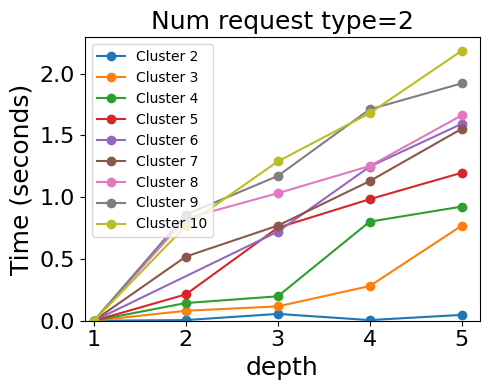

filter out depth > 5: 216


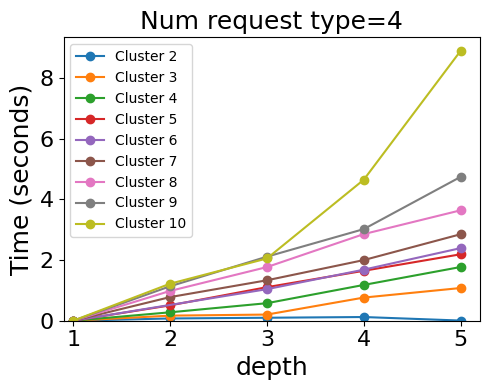

filter out depth > 5: 216


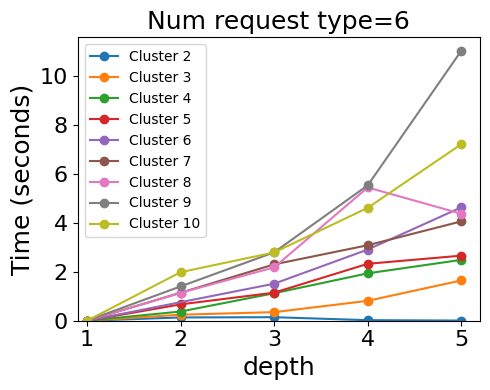

filter out depth > 5: 216


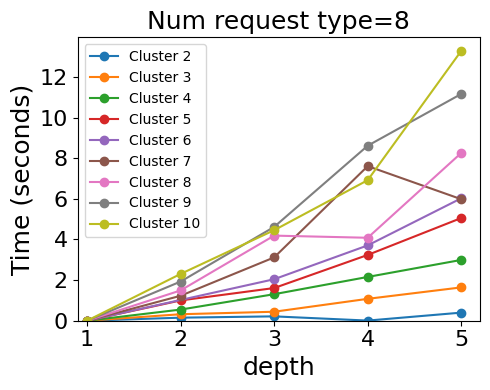

filter out depth > 5: 216


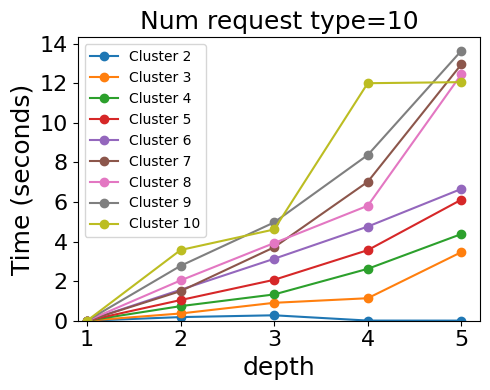

In [14]:

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
    
    
def plot_num_variable(fn, label, xaxis, yaxis, degree=None, depth=None, fanout=None):
    df = pd.read_csv(fn)
    # df["depth2"] = (df["num_svc"] - 1)/df["fanout"]
    # df["depth"] = df["depth2"].apply(lambda x: int(x))
    # df["depth"] = df["depth2"]
    # df.to_csv("result-temp2-revised.csv", index=False)
    if degree is not None:
        df = df[df["degree"]==degree]
    if depth is not None:
        df = df[df["depth"]==depth]
    if fanout is not None:
        df = df[df["fanout"]==fanout]
    
    # df = df[(df["num_cluster"]==2) | (df["num_cluster"]==4) | (df["num_cluster"]==6) | (df["num_cluster"]==8) | (df["num_cluster"]==10)]
    # df = df[df["num_request_type"]==num_request_type]
    
    df_sorted = df.sort_values(by=['num_variable', 'num_svc', 'num_endpoint', 'depth', 'num_cluster'])
    df_sorted.reset_index(drop=True, inplace=True)
    # clusters = df_sorted["num_cluster"].unique()
    labels = df_sorted[label].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
    plt.figure(figsize=(5, 4))
    for color, l_ in zip(colors, labels):
        cluster_data = df_sorted[df_sorted[label] == l_]
        # plt.plot(cluster_data[xaxis], cluster_data["num_variable"], label=f"{label}={l_}", marker='o')
        # plt.plot(cluster_data[xaxis], cluster_data["num_constraint"], label=f"{label}={l_}", marker='x')
        plt.plot(cluster_data[xaxis], cluster_data[yaxis], label=f"{label}={l_}", marker='x')
        
    # plt.title(f"Num request type={num_request_type}", fontsize=18)
    plt.title(f"Depth={depth}", fontsize=18)
    plt.xlabel(xaxis, fontsize=18)
    plt.ylabel(yaxis, fontsize=18)
    plt.xticks(cluster_data[xaxis], fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(left=0.9)
    plt.ylim(bottom=0)
    plt.legend()  # Display the legend to distinguish clusters
    plt.grid()
    plt.savefig(f"scalability-degree{degree}-fanout{fanout}-xaxis{xaxis}.pdf")
    plt.show()


def parse_and_plot(fn, fanout, num_request_type, xaxis, degree):
    df = pd.read_csv(fn)
    df = df[df["depth"]<=5]
    print(f"filter out depth > 5: {len(df)}")
    
    # df = df[(df["num_cluster"]==2) | (df["num_cluster"]==4) | (df["num_cluster"]==6) | (df["num_cluster"]==8) | (df["num_cluster"]==10)]
    # print(f"filter out odd number of clusters")
    
    df = df[df["degree"]==degree]
    df = df[df["fanout"]==fanout]
    df = df[df["num_request_type"]==num_request_type]
    df_sorted = df.sort_values(by=['num_svc', 'num_endpoint', 'num_cluster', 'num_request_type'])
    df_sorted.reset_index(drop=True, inplace=True)
    clusters = df_sorted["num_cluster"].unique()
    plt.figure(figsize=(5, 4))
    for cluster in clusters:
        cluster_data = df_sorted[df_sorted["num_cluster"] == cluster].copy()
        new_index = len(cluster_data)
        cluster_data.loc[new_index, xaxis] = 1
        cluster_data.loc[new_index, "solver_time"] = 0
        cluster_data = cluster_data.sort_values(by=[xaxis])
        plt.plot(cluster_data[xaxis], cluster_data["solver_time"], label=f'Cluster {cluster}', marker='o')
    plt.title(f"Num request type={num_request_type}", fontsize=18)
    plt.xlabel(xaxis, fontsize=18)
    plt.ylabel("Time (seconds)", fontsize=18)
    plt.xticks(cluster_data[xaxis], fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(left=0.9)
    plt.ylim(bottom=0)
    plt.legend()  # Display the legend to distinguish clusters
    plt.tight_layout()
    plt.savefig(f"scalability-numreqtype{num_request_type}-degree{degree}-fanout{fanout}-xaxis{xaxis}.pdf")
    plt.show()
    

# fn="fanout3-degree1-may2.csv"
# xaxis = 'depth'
# yaxis = 'solver_time'
# label = 'num_request_type'
# parse_and_plot(fn, fanout=3, num_request_type=2, xaxis=xaxis, degree=1)
# parse_and_plot(fn, fanout=3, num_request_type=4, xaxis=xaxis, degree=1)
# parse_and_plot(fn, fanout=3, num_request_type=6, xaxis=xaxis, degree=1)
# parse_and_plot(fn, fanout=3, num_request_type=8, xaxis=xaxis, degree=1)
# # plot_num_variable(fn, label=label, xaxis=axis, yaxis=yaxis, degree=1, depth=2, fanout=2)
# # plot_num_variable(fn, label=label, xaxis=axis, yaxis=yaxis, degree=1, depth=3, fanout=2)
# plot_num_variable(fn, label=label, xaxis=axis, yaxis=yaxis, degree=1, depth=4, fanout=2)

fn="fanout3-degree1-may2-second_trial.csv"
parse_and_plot(fn, fanout=3, num_request_type=2, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=3, num_request_type=4, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=3, num_request_type=6, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=3, num_request_type=8, xaxis="depth", degree=1)
parse_and_plot(fn, fanout=3, num_request_type=10, xaxis="depth", degree=1)

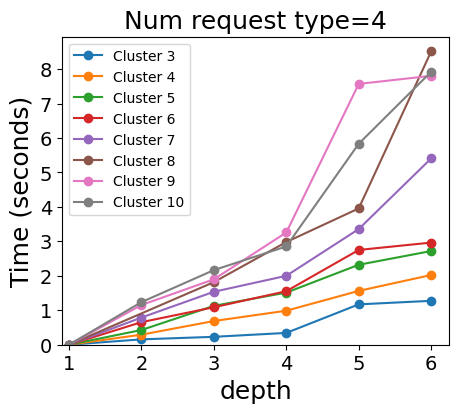

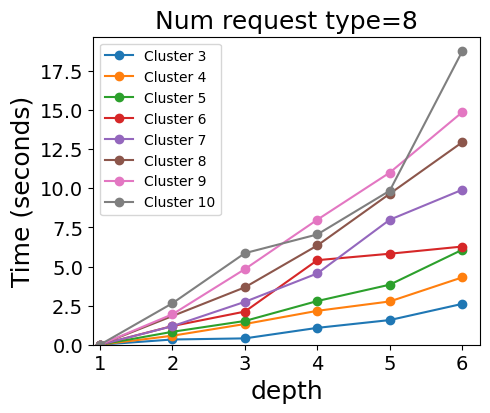